**Section 4:** We do Population prediction:
* First method for prediction is SARIMAX to forecast the population until 2050.
* Second method for prediction is Random forerest time series, this method does not bring the value of population but it is comparing the actual value and the predicted value of population. 

In [1]:
import pandas as pd
from pandas import concat
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import concat
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults   
import statsmodels.tsa.arima_process as arima
from pylab import rcParams
   
from sklearn.ensemble import RandomForestRegressor

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings

In [2]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

## Loading data, transforming, and cleaning

In [3]:
data=pd.read_excel("population.xlsx")
data.head(5)

,Series Name,Series Code,Country Name,Country Code,1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Population, total",SP.POP.TOTL,World,WLD,5.872284,5.954004,6.034484,6.114324,6.193664,6.272724,...,7.00376,7.089255,7.1755,7.261847,7.347679,7.433569,7.519183,7.602433,7.683438,7.763499


In [4]:
data.drop(columns = ["Series Name","Series Code"], inplace=True)
data.columns

Index(['Country Name', 'Country Code', '1997 [YR1997]', '1998 [YR1998]',
       '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [5]:
data.columns=['Country Name', 'Country Code', '1997', '1998', '1999','2000','2001','2002','2003','2004','2005','2006',
              '2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016', '2017', '2018','2019','2020']
data.head(2)

,Country Name,Country Code,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,World,WLD,5.872284,5.954004,6.034484,6.114324,6.193664,6.272724,6.351856,6.431527,...,7.00376,7.089255,7.1755,7.261847,7.347679,7.433569,7.519183,7.602433,7.683438,7.763499


In [6]:
year_list=['1997', '1998', '1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
           '2011','2012', '2013','2014','2015','2016', '2017', '2018','2019','2020']


new_data=pd.melt(data,id_vars=["Country Name","Country Code"],value_vars=year_list)
new_data.head()

,Country Name,Country Code,variable,value
0,World,WLD,1997,5.872284
1,World,WLD,1998,5.954004
2,World,WLD,1999,6.034484
3,World,WLD,2000,6.114324
4,World,WLD,2001,6.193664


In [7]:
new_data["Population"] = new_data["value"]
new_data["Year"]=new_data["variable"].astype(int)
new_data.drop(columns = ["Country Name","Country Code","variable","value"], inplace=True)
print('Shape of the data= ', new_data.shape)
print('Column datatypes= \n',new_data.dtypes)

new_data[['Year', 'Population']]

Shape of the data=  (24, 2)
Column datatypes= 
 Population    float64
Year            int64
dtype: object


,Year,Population
0,1997,5.872284
1,1998,5.954004
2,1999,6.034484
3,2000,6.114324
4,2001,6.193664
5,2002,6.272724
6,2003,6.351856
7,2004,6.431527
8,2005,6.511725
9,2006,6.592712


In [8]:
new_data = new_data.set_index(new_data.Year)
new_data.drop('Year', axis = 1, inplace = True)
print('Column datatypes= \n',new_data.dtypes)
new_data

Column datatypes= 
 Population    float64
dtype: object


,Population
Year,
1997,5.872284
1998,5.954004
1999,6.034484
2000,6.114324
2001,6.193664
2002,6.272724
2003,6.351856
2004,6.431527
2005,6.511725


Text(0.5, 1.0, 'Trend of the Time Series')

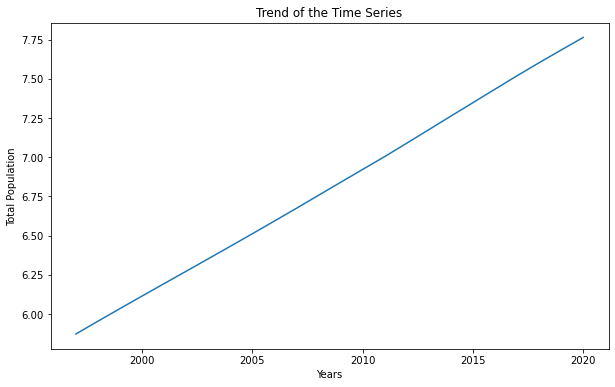

In [9]:
plt.figure(figsize= (10,6))
plt.plot(new_data)
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.title('Trend of the Time Series')

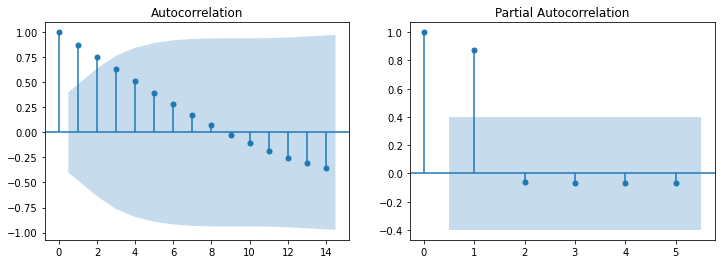

In [10]:
fig, ax = plt.subplots(1,2,figsize= (12,4))
plot_acf(new_data,ax=ax[0])
plot_pacf(new_data,ax=ax[1], lags=5, method='ywm')
plt.show()

**ADF (Augmented Dickey Fuller) Test** is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

* Null Hypothesis: The series has a unit root (value of a =1)

* Alternative Hypothesis: The series has no unit root.

In [11]:
def stationarity_test(timeseries): 
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items ():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

In [12]:
stationarity_test(new_data)

Results of Dickey-Fuller Test
Test Statistic                 -0.305729
p-value                         0.924689
#Lags Used                      1.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


* the p-value of ADF test is high than 5%
* test statistic is greater than the critical value

So we fail the null hypothesis it mean that the time series and is not stationary.**

Because time series is not stationary so we apply transformation (log)

In [13]:
new_data['data_log'] = np.log(new_data['Population'].values)
new_data['data_log_diff'] = new_data['data_log'].diff(1).values
new_data.head()

,Population,data_log,data_log_diff
Year,,,
1997,5.872284,1.770244,NaN
1998,5.954004,1.784064,0.013820
1999,6.034484,1.797490,0.013426
2000,6.114324,1.810634,0.013144
2001,6.193664,1.823527,0.012893


In [14]:
# Model Definition
model = SARIMAX(new_data["data_log_diff"].dropna(), order = (1, 0, 1))
# Model Training
model_fit = model.fit()
# Summary of the model built
model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.19846D+00    |proj g|=  2.31008D+04

At iterate    5    f= -6.42133D+00    |proj g|=  7.14462D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     66      2     0     0   7.145D+01  -6.421D+00
  F =  -6.4213285469478700     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/milanribel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/milanribel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/milanribel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Like

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          data_log_diff   No. Observations:                   23
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 147.691
Date:                Fri, 03 Jun 2022   AIC                           -289.381
Time:                        13:27:03   BIC                           -285.975
Sample:                             0   HQIC                          -288.524
                                 - 23                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9886      0.006    172.685      0.000       0.977       1.000
ma.L1          0.3596   9.24e-05   3890.338      0.000       0.359       0.360
sigma2      1.268e-07    6.2e-08      2.045      0.041    5.29e-09    2.48e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):               150.94
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             3.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.53e+26. Standard errors may be unstable.
"""

* The SARIMAX() function is used to define the ARMA(1, 1) model by passing the transformed Population series and the appropriate order as the arguments. The model is trained using the fit() method on the model definition. The summary table is displayed by using the summary() method on the fitted model.

* The P<|Z| column of the summary table shows that all the coefficients of this model are significant. Next, this model is used to generate predictions for the transformed series, and then for the original prices series.

In [15]:
new_data.drop(columns=["data_log","data_log_diff"], inplace=True)

### Time series forecasting

In [16]:
train_df = new_data.loc[:"2009"]
test_df = new_data.loc["2010":]

print("Training Set Shape - ", train_df.shape)
print("Testing Set Shape - ", test_df.shape)

Training Set Shape -  (13, 1)
Testing Set Shape -  (11, 1)


In [17]:
# Building a predictions dataframe for storing all prediction data
pred_df = pd.DataFrame(columns = ["Population", "Population_lag_1", "model_preds", "model_preds_exp", "ppl_preds"],index = new_data.index)



# Storing the original series and one lagged version (y(t) and y(t-1))
pred_df["Population"] = new_data["Population"]
pred_df["Population_lag_1"] = pred_df["Population"].shift(1)


# Predictions on transformed data over the full span of the dataset.
pred_df["model_preds"] = model_fit.predict(start = train_df.index[1], end = test_df.index[-1])

# Getting Confidence Intervals for the transformed predictions on test set 
forecast = model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05) # Confidence level of 95%


# Taking Exponent to invert logarithmic effect - exp(y_new(t))
pred_df["model_preds_exp"] = np.exp(pred_df["model_preds"].values)


# Multiplying with past lags to get the forecast and the confidence intervals - y(t-1) * exp(y_new(t))
pred_df["ppl_preds"] = pred_df["model_preds_exp"] * pred_df["Population_lag_1"]



/Users/milanribel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/milanribel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


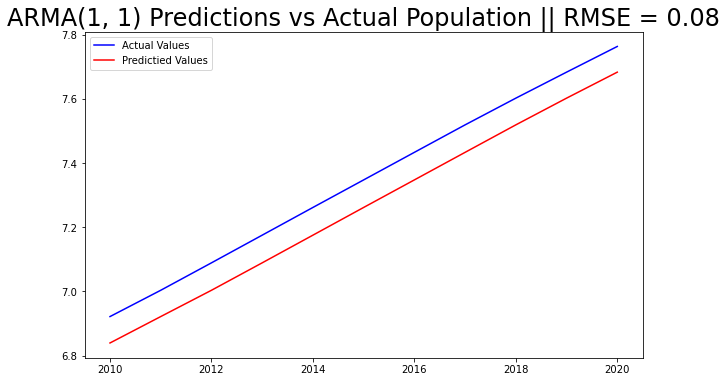

In [18]:
# RMSE Metric Calculation
arma_rmse = np.round(np.sqrt(
                    mean_squared_error(y_true = pred_df.loc[test_df.index, "Population"].values, 
                                       y_pred = pred_df.loc[test_df.index, "ppl_preds"].values)), 2)

# Plottting Actual Test Set Values
plt.plot(pred_df.loc[test_df.index, "Population"], color = "blue", label = "Actual Values")

# Plotting Predictions and Confidence Intervals
plt.plot(pred_df.loc[test_df.index, "ppl_preds"], color = "red", label = "Predictied Values")

# Setting the Title
plt.title(f"ARMA(1, 1) Predictions vs Actual Population || RMSE = {arma_rmse}", size = 24)

# Displaying the labels and plot
plt.legend()
plt.show()

In [19]:
pred_df.head()

,Population,Population_lag_1,model_preds,model_preds_exp,ppl_preds
Year,,,,,
1997,5.872284,NaN,NaN,NaN,NaN
1998,5.954004,5.872284,1.547998e-12,1.0,5.872284
1999,6.034484,5.954004,1.530376e-12,1.0,5.954004
2000,6.114324,6.034484,1.512955e-12,1.0,6.034484
2001,6.193664,6.114324,1.495732e-12,1.0,6.114324


In [20]:
model_ARIMA = ARIMA(np.asarray(pred_df["ppl_preds"]), order = (2,1,0))
model_fit_ARIMA=model_ARIMA.fit()


start_index = len(new_data.loc[:"2020"])
end_index = start_index + 29
model_prediction = model_fit_ARIMA.predict(start=start_index, end=end_index)

forecast_year_range= pd.date_range("2021", "2050", freq="YS")


df_forecast =pd.DataFrame(model_prediction, columns=['Forecast'])
df_forecast['Year'] = forecast_year_range
df_forecast[['Year', 'Forecast']]

,Year,Forecast
0,2021-01-01,7.763531
1,2022-01-01,7.843244
2,2023-01-01,7.922789
3,2024-01-01,8.002251
4,2025-01-01,8.081664
5,2026-01-01,8.161042
6,2027-01-01,8.240389
7,2028-01-01,8.319709
8,2029-01-01,8.399001
9,2030-01-01,8.478267


## Random Forest Time Series Forecast

In [21]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [22]:
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [23]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [24]:
from sklearn.metrics import mean_absolute_error
def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = random_forest_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print('>expected=%.6f, predicted=%.6f' % (testy, yhat))
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

In [25]:

# transform the time series data into supervised learning
train = series_to_supervised(new_data, n_in=5)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = new_data[-5:].values.flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.6f' % (row, yhat[0]))

Input: [7.43356933 7.5191834  7.60243273 7.68343798 7.76349865], Predicted: 7.717923


>expected=6.351856, predicted=6.272724
>expected=6.431527, predicted=6.331519
>expected=6.511725, predicted=6.404620
>expected=6.592712, predicted=6.482651
>expected=6.674182, predicted=6.558863
>expected=6.757000, predicted=6.635313
>expected=6.839554, predicted=6.718763
>expected=6.921855, predicted=6.799676
>expected=7.003760, predicted=6.882556
>expected=7.089255, predicted=6.960191
>expected=7.175500, predicted=7.047968
>expected=7.261847, predicted=7.130099
>expected=7.347679, predicted=7.216805
>expected=7.433569, predicted=7.304880
>expected=7.519183, predicted=7.386746
>expected=7.602433, predicted=7.474878
>expected=7.683438, predicted=7.562548
>expected=7.763499, predicted=7.638722
MAE: 0.119503


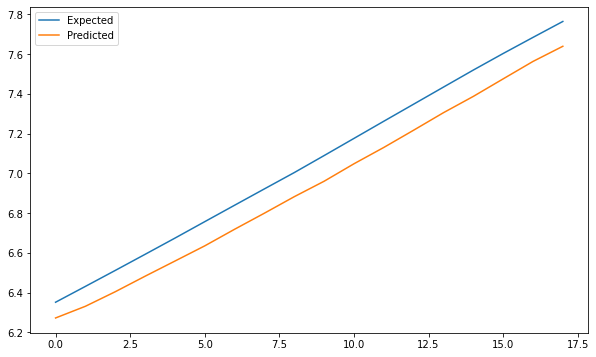

In [26]:
mae, y, yhat = walk_forward_validation(train, 18)
print('MAE: %.6f' % mae)

# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()